In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("data/card_transdata.csv")
print("Dataset loaded successfully.")

Dataset loaded successfully.


In [7]:
print("Dataset shape:", df.shape)
print("First few rows of the dataset:")
print(df.head())
print("Missing values in each column:")
print(df.isnull().sum())

Dataset shape: (1000000, 8)
First few rows of the dataset:
   distance_from_home  distance_from_last_transaction  \
0           57.877857                        0.311140   
1           10.829943                        0.175592   
2            5.091079                        0.805153   
3            2.247564                        5.600044   
4           44.190936                        0.566486   

   ratio_to_median_purchase_price  repeat_retailer  used_chip  \
0                        1.945940              1.0        1.0   
1                        1.294219              1.0        0.0   
2                        0.427715              1.0        0.0   
3                        0.362663              1.0        1.0   
4                        2.222767              1.0        1.0   

   used_pin_number  online_order  fraud  
0              0.0           0.0    0.0  
1              0.0           0.0    0.0  
2              0.0           1.0    0.0  
3              0.0           1.0    0.0

In [9]:
print("Column names in the dataset:")
print(df.columns)

Column names in the dataset:
Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud'],
      dtype='object')


In [ ]:
target_column = 'fraud'  # Updated to match your dataset
if target_column in df.columns:
    print("Target column found.")
else:
    print(f"Error: The target column '{target_column}' does not exist in the dataset.")
    exit()

Target column found.


In [13]:
if 'distance_from_home' in df.columns:
    df['Normalized_distance_from_home'] = (df['distance_from_home'] - df['distance_from_home'].mean()) / df['distance_from_home'].std()
    df.drop(['distance_from_home'], axis=1, inplace=True)

In [15]:
X = df.drop([target_column], axis=1)  # Features
y = df[target_column]                  # Target variable

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Split data into training set ({X_train.shape[0]} samples) and testing set ({X_test.shape[0]} samples).")

Split data into training set (800000 samples) and testing set (200000 samples).


In [22]:
model = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print("Best model found through GridSearchCV.")

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best model found through GridSearchCV.


In [24]:
best_model.fit(X_train, y_train)
print("Model trained successfully.")

Model trained successfully.


Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    182557
         1.0       1.00      1.00      1.00     17443

    accuracy                           1.00    200000
   macro avg       1.00      1.00      1.00    200000
weighted avg       1.00      1.00      1.00    200000



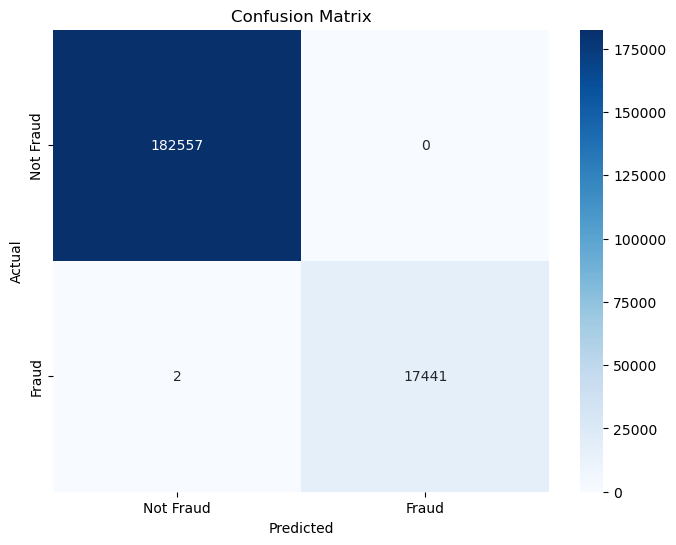

In [26]:
y_pred = best_model.predict(X_test)

# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))

confusion_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

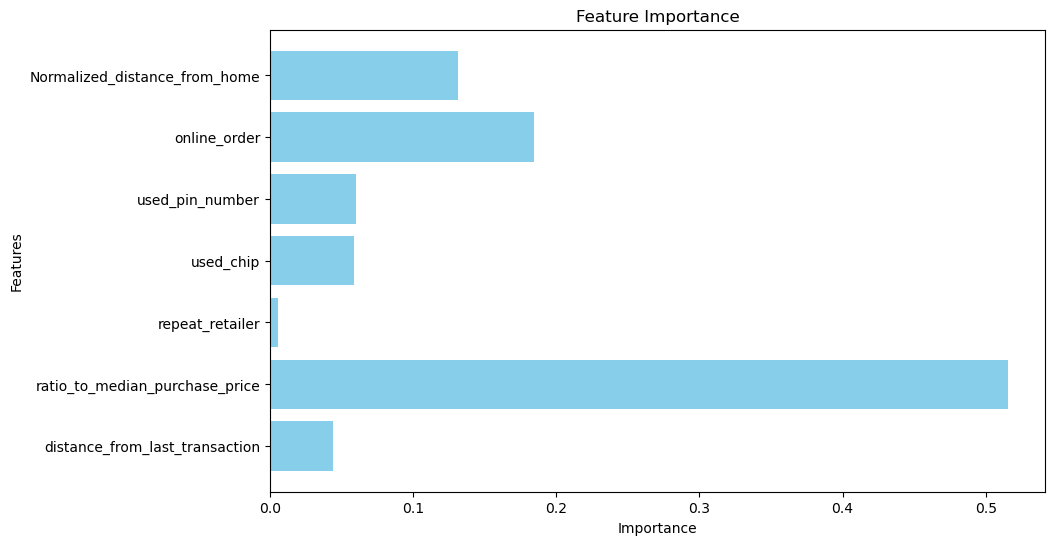

Visualized Feature Importance.


In [28]:
importances = best_model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
plt.barh(features, importances, color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()

print("Visualized Feature Importance.")